## Building the model to predict the Loan Status

### Importing neccesary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score

Reading data from csv file and converting it to dataframe

In [2]:
data = pd.read_csv('Processed_Data.csv')
df = pd.DataFrame(data)

In [3]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,146.412162,360.0,1
1,1,1,1,0,0,0,0,4583.0,1508.0,128.000000,360.0,1
2,1,1,0,0,1,2,1,3000.0,0.0,66.000000,360.0,1
3,1,1,0,1,0,2,1,2583.0,2358.0,120.000000,360.0,1
4,1,0,0,0,0,2,1,6000.0,0.0,141.000000,360.0,1


Dividing the training data into features and target variables

In [4]:
##Training data
X = df.drop('Loan_Status',axis=1)#Features
y = df['Loan_Status']#Target

In [5]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1


In [6]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Splitting the data into train and test splits using sklearn train_test_split

In [7]:
#Split data into train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [8]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
442,1,0,3,1,0,1,4707.0,1993.0,148.0,360.0,1
306,0,0,0,0,0,0,3762.0,1666.0,135.0,360.0,1
276,1,1,0,0,0,1,3993.0,3274.0,207.0,360.0,1
555,1,1,1,0,0,1,5468.0,1032.0,26.0,360.0,1
404,0,0,0,0,1,0,7441.0,0.0,194.0,360.0,1


In [9]:
y_train

442    1
306    1
276    1
555    1
404    0
      ..
599    1
360    0
439    1
174    0
122    1
Name: Loan_Status, Length: 460, dtype: int64

#### Logistic Regression model without normalizing the data

In [10]:
#Development and Prediction
#Logistic Regrssion
lr = LogisticRegression()

#Fit the data
lr.fit(X_train,y_train)

#predict using test data
y_predicted = lr.predict(X_test)

Evaluation using Confusion Matrix

In [11]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_predicted)
matrix

array([[17, 36],
       [ 6, 95]], dtype=int64)

Visualizing Confusion Matrix 

Text(0.5, 257.44, 'Predicted label')

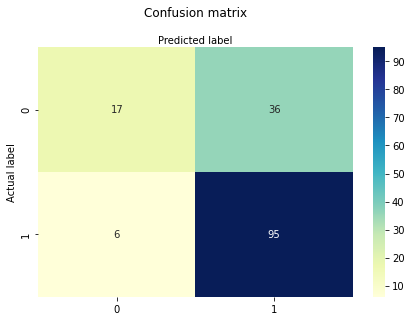

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion Matrix Evaluation Metrics

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Accuracy: 0.7272727272727273
Precision: 0.7251908396946565
Recall: 0.9405940594059405


ROC Curve

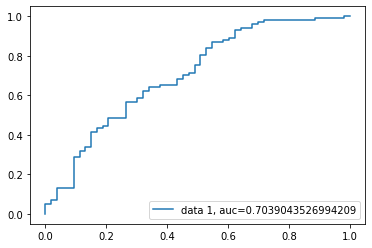

In [14]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.70 . Not a great score.

#### Normalizing data for better results, Trying again with the Logistic regression

In [26]:
#Normalizing data 
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Applying Logistic Regression 

In [16]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

y_predicted = lr.predict(X_test)

Evaluation using Confusion Matrix

In [17]:
c_m = metrics.confusion_matrix(y_test, y_predicted)
c_m

array([[23, 30],
       [ 7, 94]], dtype=int64)


Confusion Matrix Evaluation Metrics

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Accuracy: 0.7597402597402597
Precision: 0.7580645161290323
Recall: 0.9306930693069307


ROC Curve

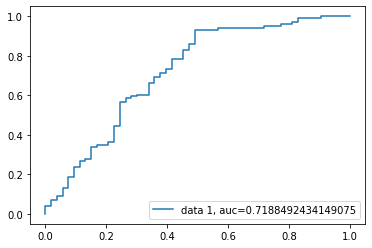

In [19]:
y_pred_prob = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Creating a function to evaluate models and print the metric scores below 

In [47]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=4)
knn = KNeighborsClassifier(n_neighbors=3)
svc = SVC(random_state = 48,probability=True)
models = {
    'knn' : knn,
    'DecisionTreeClassifier':dtc,
    'SVC' : svc
}

In [48]:
def loss(y_true,y_pred, retu=False):
    p = precision_score(y_true,y_pred)
    r = recall_score(y_true,y_pred)
    f = f1_score(y_true,y_pred)
    l = log_loss(y_true,y_pred)
    a = accuracy_score(y_true,y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.4f\n  rec: %.4f\n  f1: %.4f\n  loss: %.4f\n  acc: %.4f' % (p, r, f, l, a))

In [49]:
def evaluate_model(models,X,y):
    for name,model in models.items():
        print(name, ":")
        model.fit(X,y)
        loss(y, model.predict(X))
        print("-:-:-:-:-"*5)

In [50]:
evaluate_model(models, X_train, y_train)

knn :
  pre: 0.8384
  rec: 0.9377
  f1: 0.8853
  loss: 5.8567
  acc: 0.8304
-:-:-:-:--:-:-:-:--:-:-:-:--:-:-:-:--:-:-:-:-
DecisionTreeClassifier :
  pre: 0.8283
  rec: 0.9470
  f1: 0.8837
  loss: 6.0069
  acc: 0.8261
-:-:-:-:--:-:-:-:--:-:-:-:--:-:-:-:--:-:-:-:-
SVC :
  pre: 0.8017
  rec: 0.9065
  f1: 0.8509
  loss: 7.6587
  acc: 0.7783
-:-:-:-:--:-:-:-:--:-:-:-:--:-:-:-:--:-:-:-:-


From the results we can see that KNeighbourClassifier performs well.

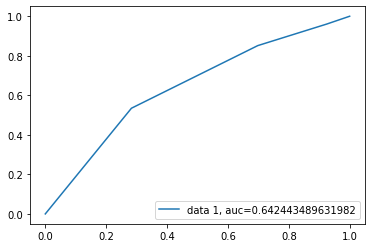

In [51]:
k_pred_prob = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  k_pred_prob)
auc = metrics.roc_auc_score(y_test, k_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

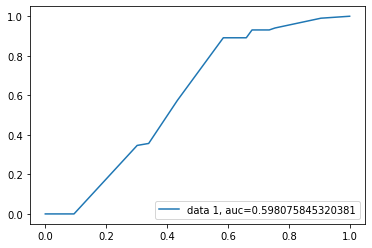

In [52]:
d_pred_prob = dtc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  d_pred_prob)
auc = metrics.roc_auc_score(y_test, d_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

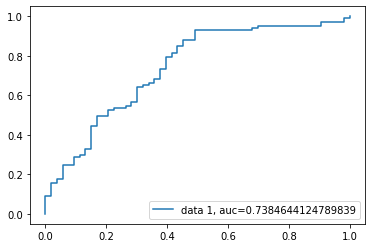

In [53]:
s_pred_prob = svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  s_pred_prob)
auc = metrics.roc_auc_score(y_test, s_pred_prob)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()